<hr>

# Welcome to Week 7
<hr>

**Support Vector Machines (SVM)** is a type of supervised machine learning algorithm that can be used for classification or regression tasks. SVM can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. [More details](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)<br>
Types of kernel:
- Linear Kernel: $k(X_i,X_j)=(X_i^T,X_j)$, mapping $\phi(X)=x$
- Polynomial Kernel with degree $p:k(X_i,X_j)=(1+X_i^TX_j)^p$ 
- Radial basis function (RBF) kernel:$k(X_i,X_j)=e^-{\frac{||X_i-X_j||^2}{2\sigma ^2}}$ Mapping $\phi(X)$ is infinite dimensional.
<hr>

<img src="figure/Kernel trick and non-linear SVM image 4.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
 <br>

### iris datasets

In [24]:
# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

# We'll use the petal length and width only for this analysis
X = iris.data
y = iris.target

# Place the iris data into a pandas dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print("X is of type: {}".format(type(X)))
print("y is of type: {}".format(type(y)))

# How does our data look
#print first 5 rows of X
print("First 5 rows of our data: {}".format(X[:5,:]))

#print the unique labels in y
print("unique labels: {}".format(np.unique(y)))
# View the first 5 rows of the data
print(iris_df.head())


X is of type: <class 'numpy.ndarray'>
y is of type: <class 'numpy.ndarray'>
First 5 rows of our data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
unique labels: [0 1 2]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

# We'll use the petal length and width only for this analysis
X = iris.data
y = iris.target

X = X[:,:2] # Use only the first 2 columns. This is for easy plotting/visualisation
x, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]

#Split the data into 80% Training and 20% Testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(80, 2)
(80,)
(20, 2)
(20,)


In [28]:
from matplotlib.colors import ListedColormap

# We define a colormap with three colors, for three labels our data
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    '''
    This function takes a model (estimator),
    '''
    print()
    estimator.fit(X, y)
    # Determine the maximum and minimum mesh as a boundary
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    # Generating the points on the mesh
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100))
    # Make predictions on the grid points
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # for color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Original training sample
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()
    

SVM Training Accuracy: 0.7125



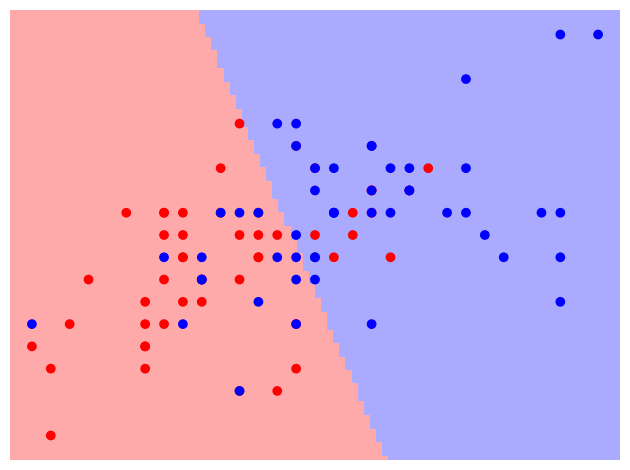

In [32]:
# Fit SVM using linear kernel on training data
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
svc_model = svm.SVC(kernel='linear')
svc_model.fit(Xtrain, ytrain)

#Training/Testing Accuracy:
svc_acc = metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))
print("SVM Training Accuracy: {}".format(svc_acc))
plot_estimator(svc_model,x,y)

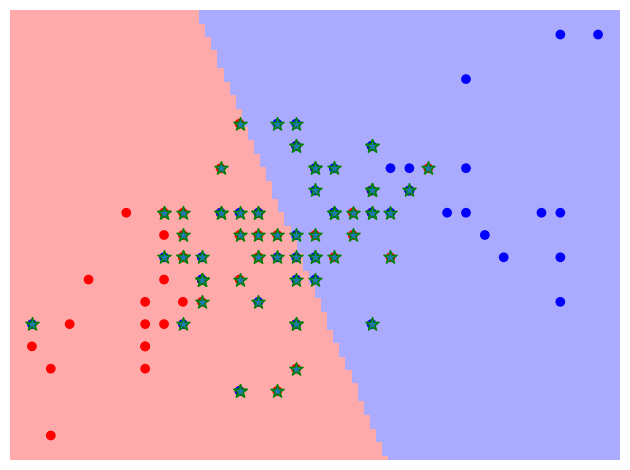

In [34]:
# Plotting support vectors
plot_estimator(svc_model,x,y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.show()

In [35]:
#Testing Accuracy:
svc_acc_test = metrics.accuracy_score(ytest, svc_model.predict(Xtest))
print("SVM Testing Accuracy: {}".format(svc_acc_test))

SVM Testing Accuracy: 0.7



Data has a total of 55 support vectors
Training accuracy: 0.725
Testing accuracy : 0.7


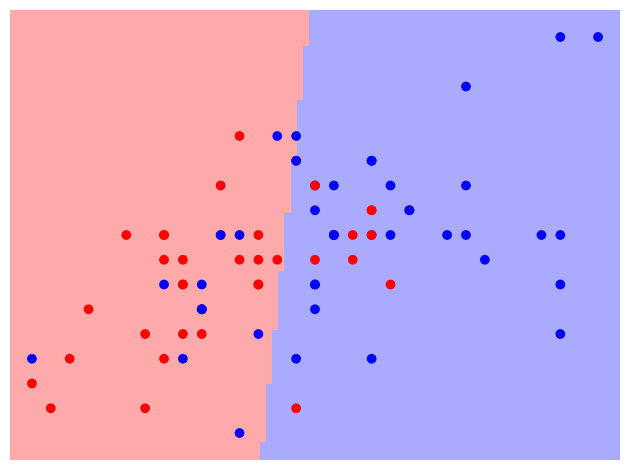

In [36]:
svc_model = svm.SVC(kernel='linear', C=1e2)
svc_model.fit(Xtrain, ytrain)
plot_estimator(svc_model, Xtrain, ytrain)
print("Data has a total of {} support vectors".format(svc_model.support_vectors_.shape[0]))

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))

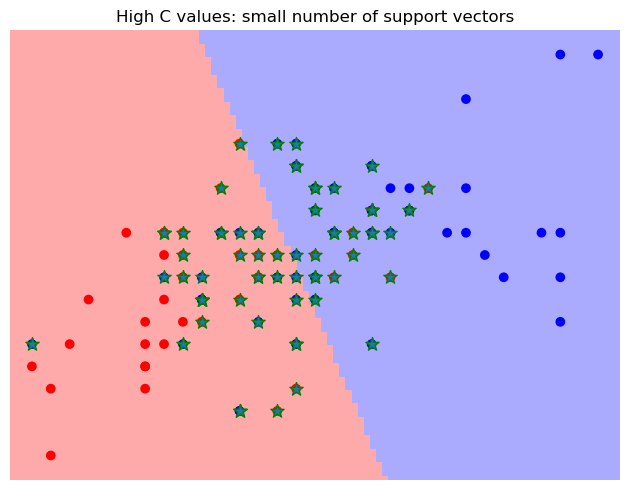

In [38]:
# Plotting support vectors
plot_estimator(svc_model,x,y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.title('High C values: small number of support vectors')
plt.show()

Data has a total of 76 support vectors

Training accuracy: 0.7
Testing accuracy : 0.65


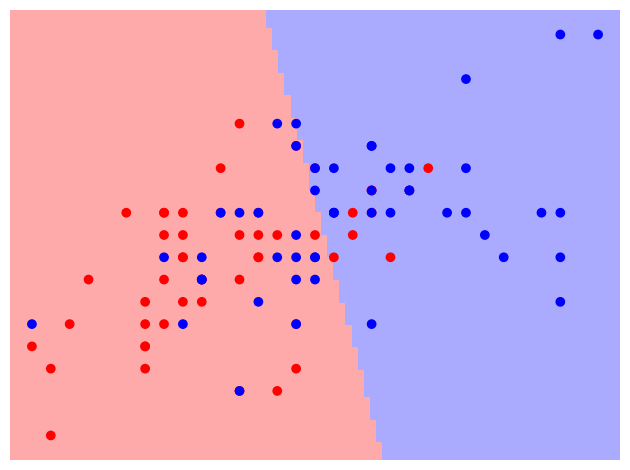

In [40]:
svc_model = svm.SVC(kernel='linear', C=1e-2)

svc_model.fit(Xtrain, ytrain)
print("Data has a total of {} support vectors".format(svc_model.support_vectors_.shape[0]))

plot_estimator(svc_model, x, y)

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))

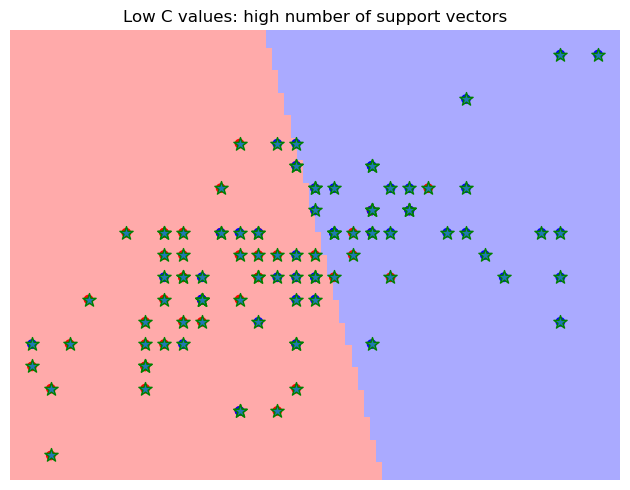

In [42]:
# Plotting support vectors
plot_estimator(svc_model,x,y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='*', edgecolors='g', zorder=10)
plt.title('Low C values: high number of support vectors')
plt.show()

C:\Users\sit\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


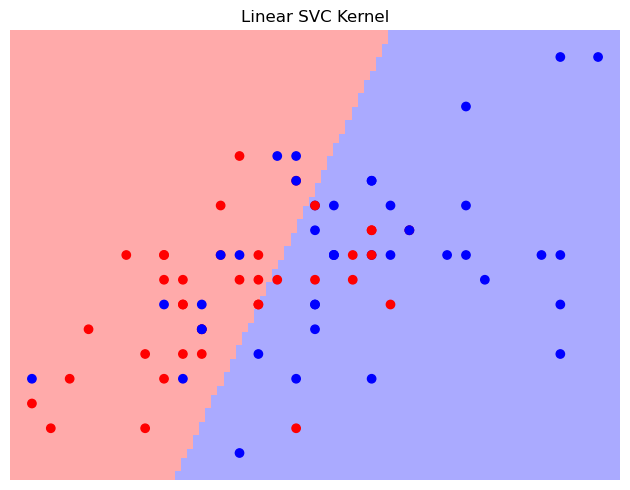

In [43]:
svc_model = svm.LinearSVC()
plot_estimator(svc_model, Xtrain, ytrain)
plt.title('Linear SVC Kernel')
plt.show()


Training accuracy: 0.725
Testing accuracy : 0.7


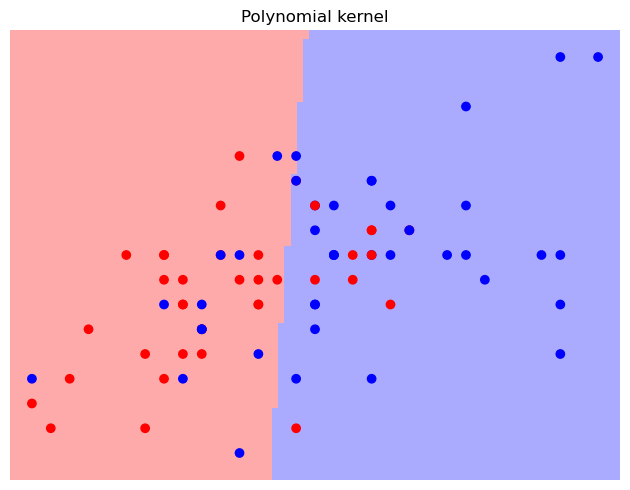

In [44]:
svc_model = svm.SVC(kernel='poly', degree=2)

svc_model.fit(Xtrain,ytrain)
plot_estimator(svc_model, Xtrain, ytrain)
plt.title('Polynomial kernel')

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))

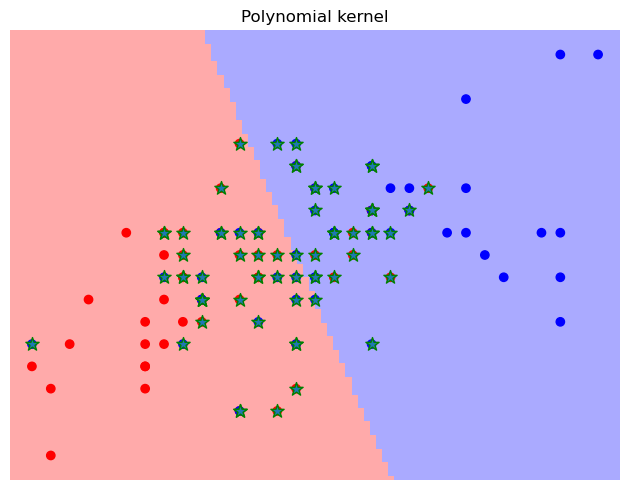

In [46]:
#plotting support vectors
plot_estimator(svc_model, x, y)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], marker='*', s=100, edgecolors='g', zorder=10)
plt.title('Polynomial kernel')
plt.show()


Training accuracy: 0.8875
Testing accuracy : 0.85


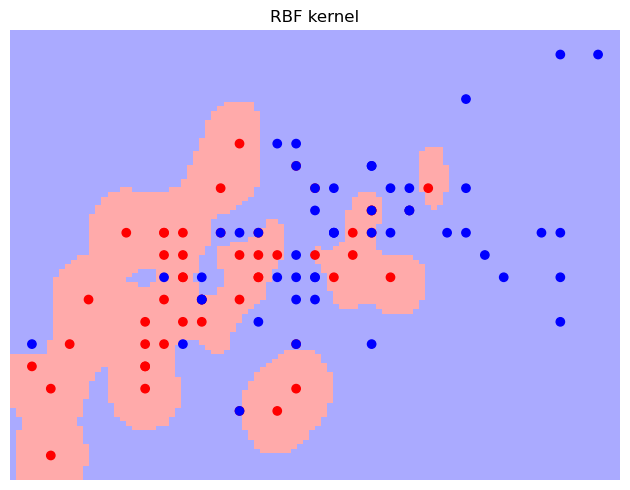

In [49]:
svc_model = svm.SVC(kernel='rbf', gamma=1e2)

svc_model.fit(x,y)
plot_estimator(svc_model, x, y)
plt.title('RBF kernel')
#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain, svc_model.predict(Xtrain))))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest, svc_model.predict(Xtest))))

In [22]:
Xtrain

array([[7.6, 3. , 6.6, 2.1],
       [6. , 3. , 4.8, 1.8],
       [6.8, 2.8, 4.8, 1.4],
       [5.8, 2.6, 4. , 1.2],
       [6. , 2.2, 5. , 1.5],
       [6.7, 3.1, 4.4, 1.4],
       [5.5, 2.6, 4.4, 1.2],
       [6.3, 2.5, 5. , 1.9],
       [5.2, 2.7, 3.9, 1.4],
       [7.7, 2.8, 6.7, 2. ],
       [5.9, 3. , 4.2, 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [7.7, 3. , 6.1, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 3.2, 5.9, 2.3],
       [5.7, 2.8, 4.5, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [6. , 3.4, 4.5, 1.6],
       [5.6, 3. , 4.5, 1.5],
       [5.7, 2.8, 4.1, 1.3],
       [5.4, 3. , 4.5, 1.5],
       [4.9, 2.4, 3.3, 1. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 3. , 5. , 1.7],
       [5.6, 2.5, 3.9, 1.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 3. , 5.5, 2.1],
       [6.1, 2.9, 4.7, 1.4],
       [6.4, 2.9, 4.3, 1.3],
       [5.5, 2.3, 4. , 1.3],
       [5.8, 2.7, 4.1, 1. ],
       [5.6, 3. , 4.1, 1.3],
       [6.6, 2

### feature relationship

In [17]:
import seaborn as sns
sns.pairplot(iris_df)

### checking class balance

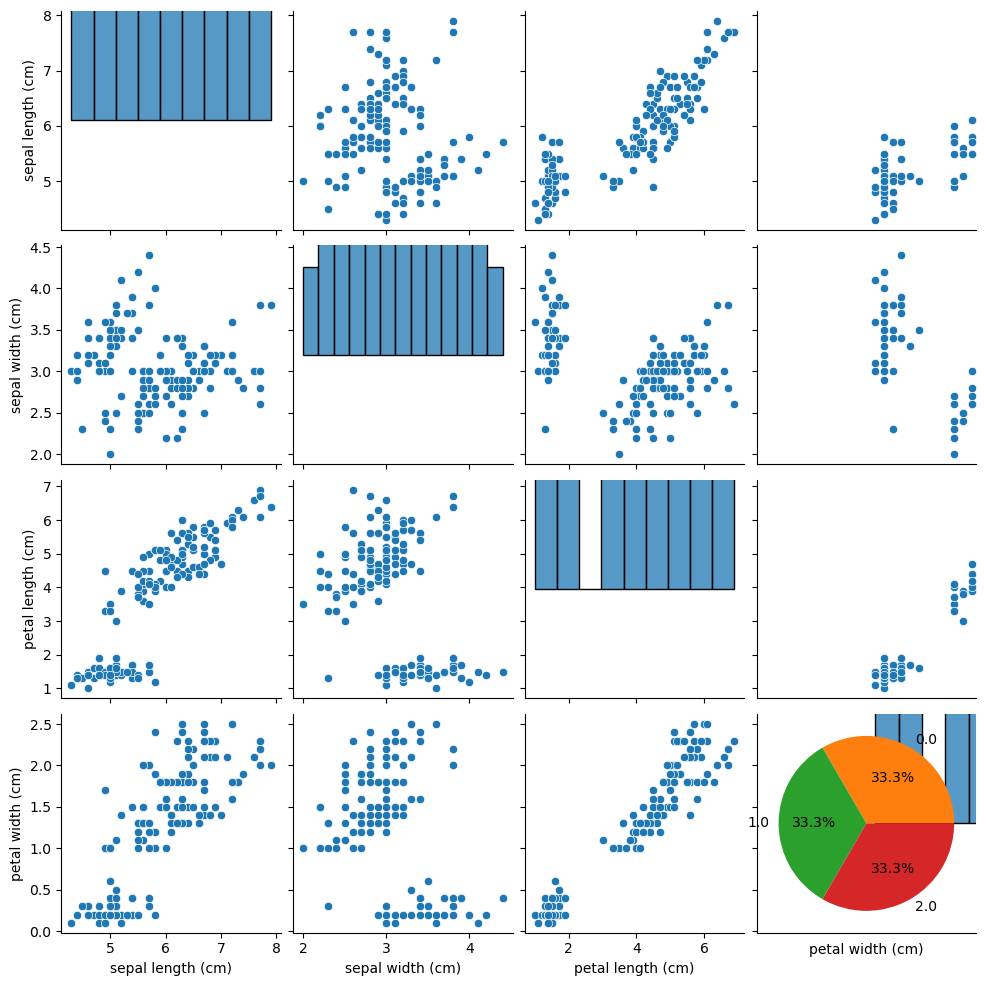

In [18]:
from collections import Counter
import matplotlib.pyplot as plt
counts = Counter(y)
plt.pie([float(v) for v in counts.values()], labels=[float(k) for k in counts],
           autopct='%1.1f%%')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


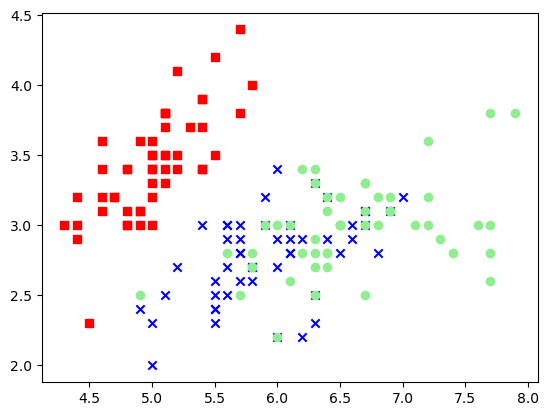

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)
plt.show()

### Train and test data spliting

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 120 samples in the training set and 30 samples in the test set



### data scaling

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After z-scorescaling on features:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

After z-scorescaling on features:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.613030          0.108501           0.947518          0.736072
1          -0.567766         -0.124001           0.384914          0.347530
2          -0.803926          1.038510          -1.302896         -1.336154
3           0.258791         -0.124001           0.609956          0.736072
4           0.613030         -0.589006           1.003778          1.254129


### feature distribution with mean,$\mu= 0$

<Figure size 640x480 with 0 Axes>

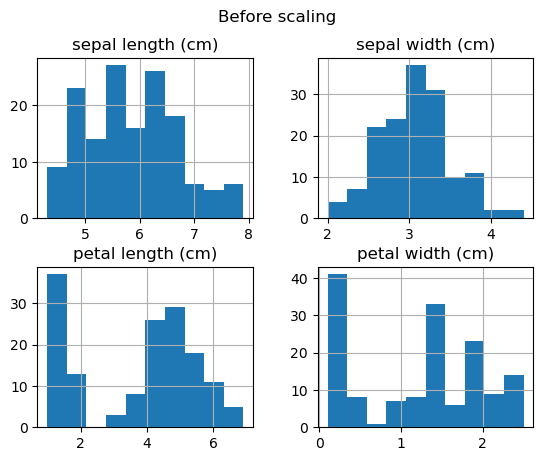

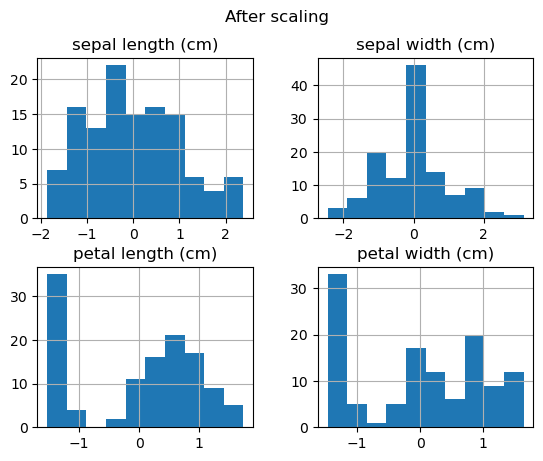

In [22]:
import seaborn as sns
plt.figure()
iris_df.hist()
plt.suptitle("Before scaling")
pd.DataFrame(X_train_std, columns=iris_df.columns).hist()
plt.suptitle("After scaling")
plt.show()

### train and test model

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.96 out of 1
The accuracy of the svm classifier on test data is 1.00 out of 1


### PCA to reduce the diment into 2

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced_data_train=pca.fit_transform(X_train_std)
reduced_data_test=pca.transform(X_test_std)
print(reduced_data_test.shape)

(30, 2)


### visulizing SVM boundaries for one vs rest

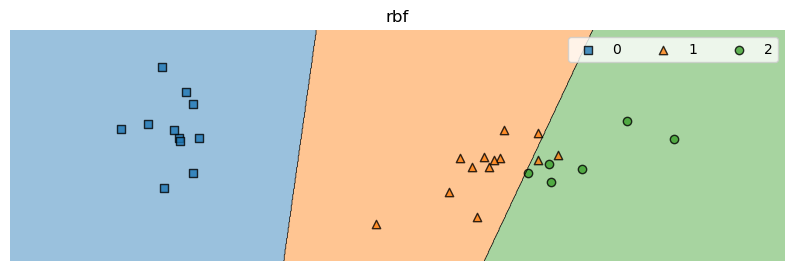

In [25]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,3))

classifier=SVC(kernel="linear", random_state=0, gamma=.10, C=1.0,decision_function_shape='ovr').fit(reduced_data_train,y_train)
# Plot decision boundary
plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
plt.title(kernel)
plt.legend(ncol=3)
plt.axis("off")
plt.show()

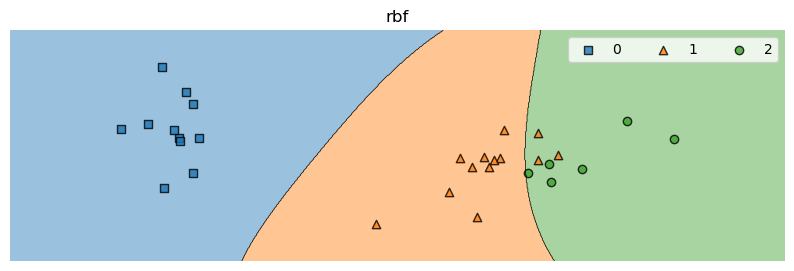

In [26]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,3))

classifier=SVC(kernel="rbf", random_state=0, gamma=.10, C=1.0,decision_function_shape='ovr').fit(reduced_data_train,y_train)
# Plot decision boundary
plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
plt.title(kernel)
plt.legend(ncol=3)
plt.axis("off")
plt.show()

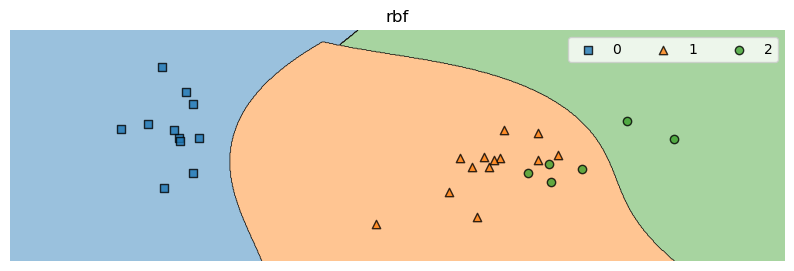

In [27]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,3))

classifier=SVC(kernel="poly", random_state=0, gamma=.10, C=1.0,decision_function_shape='ovr').fit(reduced_data_train,y_train)
# Plot decision boundary
plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
plt.title(kernel)
plt.legend(ncol=3)
plt.axis("off")
plt.show()

In [28]:
# from mlxtend.plotting import plot_decision_regions
# plt.figure(figsize=(10,3))
# cnt=1
# for kernel in ["poly","linear","rbf"]:
#     classifier=SVC(kernel=kernel, random_state=0, gamma=.10, C=1.0,decision_function_shape='ovr').fit(reduced_data_train,y_train)
#     # Plot decision boundary
#     plt.subplot(1,3,cnt)
#     plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
#     plt.title(kernel)
#     plt.legend(ncol=3)
#     plt.axis("off")
#     cnt+=1
# plt.show()

### visulizing SVM boundaries for one vs one

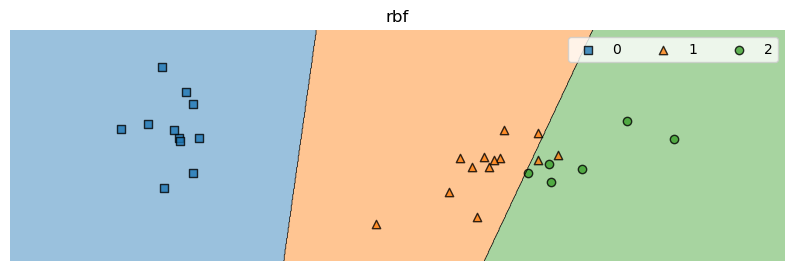

In [29]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,3))

classifier=SVC(kernel="linear", random_state=0, gamma=.10, C=1.0,decision_function_shape='ovo').fit(reduced_data_train,y_train)
# Plot decision boundary
plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
plt.title(kernel)
plt.legend(ncol=3)
plt.axis("off")
plt.show()

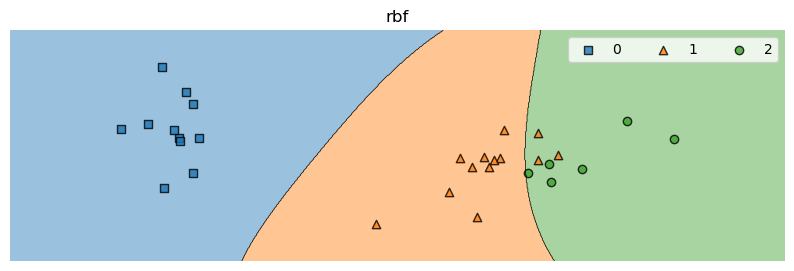

In [30]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,3))

classifier=SVC(kernel="rbf", random_state=0, gamma=.10, C=1.0,decision_function_shape='ovo').fit(reduced_data_train,y_train)
# Plot decision boundary
plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
plt.title(kernel)
plt.legend(ncol=3)
plt.axis("off")
plt.show()

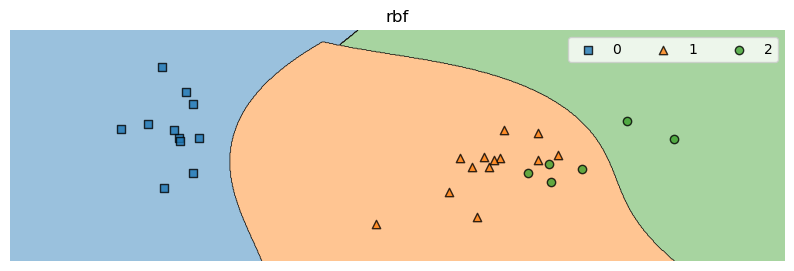

In [31]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,3))

classifier=SVC(kernel="poly", random_state=0, gamma=.10, C=1.0,decision_function_shape='ovo').fit(reduced_data_train,y_train)
# Plot decision boundary
plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
plt.title(kernel)
plt.legend(ncol=3)
plt.axis("off")
plt.show()

<hr> 

# Task
1. Load "digits" datasets from SKlearn and do the t-SNE for n=3
2. Visualizing the After and before t-SNE for the first two features.
3. Do the SVM with rbf kernel and report classification score

<hr> 